# MNIST实战

## MNIST介绍
<img src='./images/05.png' style='zoom:50%'>

## 代码实战过程：

In [1]:
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim

import torchvision
from matplotlib import pyplot as plt

from utils import plot_image, plot_curve, one_hot

In [2]:
batch_size = 512

#### <font color=green> 读入数据：</font>

torch.Size([512, 1, 28, 28]) torch.Size([512]) tensor(-0.4242) tensor(2.8215)


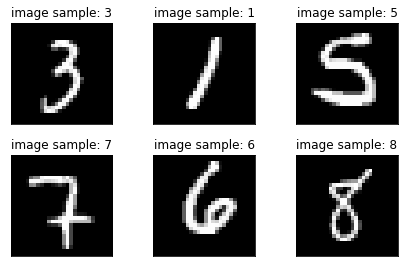

In [3]:
# step1. load dataset
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./data/mnist_data', train=True, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./data/mnist_data/', train=False, download=True,
                               transform=torchvision.transforms.Compose([
                                   torchvision.transforms.ToTensor(),
                                   torchvision.transforms.Normalize(
                                       (0.1307,), (0.3081,))
                               ])),
    batch_size=batch_size, shuffle=False)

x, y = next(iter(train_loader))
print(x.shape, y.shape, x.min(), x.max())
plot_image(x, y, 'image sample')

#### <font color=green> 网络设计：</font>

In [4]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        # xw+b
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        # x: [b, 1, 28, 28]
        # h1 = relu(xw1+b1)
        x = F.relu(self.fc1(x))
        # h2 = relu(h1w2+b2)
        x = F.relu(self.fc2(x))
        # h3 = h2w3+b3
        x = self.fc3(x)

        return x

In [5]:
net = Net()
# [w1, b1, w2, b2, w3, b3]
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

train_loss = []

#### <font color=green> 训练：</font>

In [6]:
for epoch in range(3):

    for batch_idx, (x, y) in enumerate(train_loader):

        # x: [b, 1, 28, 28], y: [512]
        # [b, 1, 28, 28] => [b, 784]
        x = x.view(x.size(0), 28*28)
        # => [b, 10]
        out = net(x)
        # [b, 10]
        y_onehot = one_hot(y)
        # loss = mse(out, y_onehot)
        loss = F.mse_loss(out, y_onehot)

        optimizer.zero_grad()
        loss.backward()
        # w' = w - lr*grad
        optimizer.step()
        

        train_loss.append(loss.item())     # loss tensor加上 item()之后可以变成 np 数据类型进行保存。
        if batch_idx % 10==0:
            print(epoch, batch_idx, loss.item())


0 0 0.11041081696748734
0 10 0.0932936742901802
0 20 0.08265504240989685
0 30 0.07555026561021805
0 40 0.072274349629879
0 50 0.06657125800848007
0 60 0.06119895353913307
0 70 0.05710800364613533
0 80 0.05561643838882446
0 90 0.052810363471508026
0 100 0.05145512521266937
0 110 0.04761335626244545
1 0 0.04615924134850502
1 10 0.047983910888433456
1 20 0.045610424131155014
1 30 0.04404035583138466
1 40 0.04226018115878105
1 50 0.04314471781253815
1 60 0.040052324533462524
1 70 0.04060174897313118
1 80 0.04131445661187172
1 90 0.04046715795993805
1 100 0.03827390447258949
1 110 0.036884207278490067
2 0 0.03840433433651924
2 10 0.03851672261953354
2 20 0.033999305218458176
2 30 0.03625723719596863
2 40 0.03604350611567497
2 50 0.03338417038321495
2 60 0.03534705191850662
2 70 0.03305565193295479
2 80 0.03543749451637268
2 90 0.0314202606678009
2 100 0.03435288369655609
2 110 0.03184641897678375


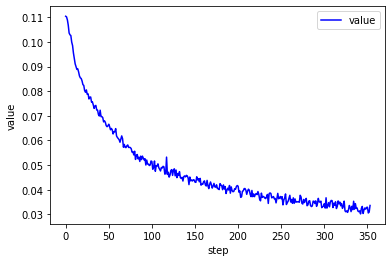

In [7]:
plot_curve(train_loss)
# we get optimal [w1, b1, w2, b2, w3, b3]

#### <font color=green> 验证准确度：</font>

In [8]:
total_correct = 0
for x,y in test_loader:
    x  = x.view(x.size(0), 28*28)
    out = net(x)
    # out: [b, 10] => pred: [b]
    pred = out.argmax(dim=1)
    correct = pred.eq(y).sum().float().item()
    total_correct += correct

total_num = len(test_loader.dataset)
acc = total_correct / total_num
print('test acc:', acc)

test acc: 0.8921


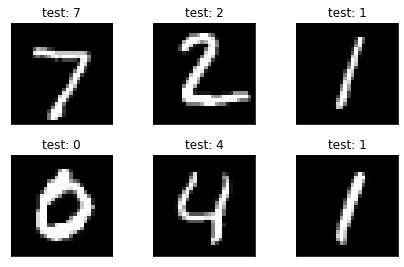

In [9]:
x, y = next(iter(test_loader))
out = net(x.view(x.size(0), 28*28))
pred = out.argmax(dim=1)
plot_image(x, pred, 'test')